# CONTENT-BASED RECOMMENDATION SYSTEM FOR IMAGES IN DIGITAL MARKETING

- Image similarity techniques are adopted to determine similar images to given image.

#### Importing cifar10 dataset from keras

In [4]:
from keras.datasets import cifar10
(x_trg,y_trg),(x_tst_org,y_tst_org)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
print("Original Dimension of training dataset:",x_trg.shape)
print("Original Dimension of testing dataset:",x_tst_org.shape)

Original Dimension of training dataset: (50000, 32, 32, 3)
Original Dimension of testing dataset: (10000, 32, 32, 3)


- Dimension of the training dataset - (50000, 32, 32, 3) means 50000 images,each of dimension 32*32 and these are colored images.
- Similar,Dimension of the testing dataset - (10000, 32, 32, 3) means 10000 images,each of dimension 32*32 and these are colored images.

#### Reshaping the dataset in a single array

In [6]:
import numpy as np
x_test = np.reshape(x_tst_org, (10000, 3072))
print("New Dimension of test dataset:",x_test.shape)


New Dimension of test dataset: (10000, 3072)


- We want a smaller number of images.Hence, we will do analysis on 10000 only.
- It is important to have the data in 2D,hence we need to reshape the data.
- The size is 32 * 32 and it is colored image,we will reshape in a size of 3072 (32 * 32*3=3072) dimension.

- It is important to understand the dataset before applying the distance algorithm.This includes determining the unique number of categories in the dataset,the number of images belonging to different categories.

#### Creating Dataframe of dependent variable

In [7]:
import pandas as pd
df = pd.DataFrame(y_trg,columns=['Category'])
df.head()

,Category
0,6
1,9
2,9
3,4
4,1


In [8]:
# Displaying the information of number of categories
print("Number of categories are:",df['Category'].nunique())
print("The categories are:\n",df['Category'].unique())

Number of categories are: 10
The categories are:
 [6 9 4 1 2 7 8 3 5 0]


#### Filtering the observations for different categories

- It should be noted that filtering is possible only on DataFrame.

In [9]:
img_list = []
for i in range(10):
    img_list.append(df.index[df['Category'] == i])
    print("Indexes for category",i,"are:\n",img_list[i])

Indexes for category 0 are:
 Index([   29,    30,    35,    49,    77,    93,   115,   116,   129,   165,
       ...
       49856, 49863, 49868, 49869, 49891, 49921, 49930, 49941, 49992, 49994],
      dtype='int64', length=5000)
Indexes for category 1 are:
 Index([    4,     5,    32,    44,    45,    46,    60,    61,    64,    65,
       ...
       49932, 49933, 49937, 49959, 49973, 49977, 49989, 49993, 49998, 49999],
      dtype='int64', length=5000)
Indexes for category 2 are:
 Index([    6,    13,    18,    24,    41,    42,    47,    48,    54,    55,
       ...
       49877, 49881, 49888, 49914, 49956, 49969, 49972, 49987, 49991, 49995],
      dtype='int64', length=5000)
Indexes for category 3 are:
 Index([    9,    17,    21,    26,    33,    36,    38,    39,    59,    74,
       ...
       49922, 49934, 49940, 49944, 49958, 49970, 49975, 49979, 49982, 49983],
      dtype='int64', length=5000)
Indexes for category 4 are:
 Index([    3,    10,    20,    28,    34,    58,    66,

#### Displaying the images belonging to different categories

In [10]:
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
count = 1
for a in range(0,10):
  for i in range(0,15):
    plt.subplot(10,15,count)
    plt.imshow(x_trg[img_list[a][i]])
    count+=1
plt.show()



# COSINE SIMILARITY FOR IMAGE DATA ANALYSIS

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
# Determining the cosine similarity between observations
cos_similarity = cosine_similarity(x_test)
print("The shape of the matrix is:",cos_similarity.shape)
print("Details of cosine similarity:\n",cos_similarity)

The shape of the matrix is: (10000, 10000)
Details of cosine similarity:
 [[1.         0.79583195 0.82151255 ... 0.64801221 0.82733195 0.83008814]
 [0.79583195 1.         0.92238058 ... 0.54362172 0.77232153 0.83659096]
 [0.82151255 0.92238058 1.         ... 0.52125773 0.7861782  0.86060603]
 ...
 [0.64801221 0.54362172 0.52125773 ... 1.         0.70871188 0.62527745]
 [0.82733195 0.77232153 0.7861782  ... 0.70871188 1.         0.78221302]
 [0.83008814 0.83659096 0.86060603 ... 0.62527745 0.78221302 1.        ]]


In [13]:
# Converting the dataframe
cosine_dataframe = pd.DataFrame(cos_similarity)
print(cosine_dataframe)
print("Shape of the data frame is:",cosine_dataframe.shape)

          0         1         2         3         4         5         6     \
0     1.000000  0.795832  0.821513  0.877096  0.852871  0.872336  0.755351   
1     0.795832  1.000000  0.922381  0.913347  0.774283  0.821746  0.668802   
2     0.821513  0.922381  1.000000  0.926604  0.783206  0.803408  0.697819   
3     0.877096  0.913347  0.926604  1.000000  0.845271  0.851521  0.734510   
4     0.852871  0.774283  0.783206  0.845271  1.000000  0.839958  0.722294   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.812125  0.799669  0.781408  0.830396  0.906759  0.813024  0.720970   
9996  0.861926  0.715368  0.722900  0.796198  0.896341  0.871540  0.729010   
9997  0.648012  0.543622  0.521258  0.595192  0.776171  0.646602  0.622933   
9998  0.827332  0.772322  0.786178  0.807643  0.857348  0.829581  0.721444   
9999  0.830088  0.836591  0.860606  0.882774  0.836200  0.814343  0.688477   

          7         8         9     ...      9990      9991    

In [14]:
cosine_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.795832,0.821513,0.877096,0.852871,0.872336,0.755351,0.863729,0.904388,0.829353,...,0.716433,0.814726,0.773528,0.812079,0.780722,0.812125,0.861926,0.648012,0.827332,0.830088
1,0.795832,1.000000,0.922381,0.913347,0.774283,0.821746,0.668802,0.770869,0.844167,0.902748,...,0.725676,0.912751,0.614074,0.681019,0.775788,0.799669,0.715368,0.543622,0.772322,0.836591
2,0.821513,0.922381,1.000000,0.926604,0.783206,0.803408,0.697819,0.795558,0.865396,0.888378,...,0.741180,0.903006,0.579617,0.717482,0.768858,0.781408,0.722900,0.521258,0.786178,0.860606
3,0.877096,0.913347,0.926604,1.000000,0.845271,0.851521,0.734510,0.864583,0.918344,0.916213,...,0.771767,0.912368,0.679662,0.731089,0.785677,0.830396,0.796198,0.595192,0.807643,0.882774
4,0.852871,0.774283,0.783206,0.845271,1.000000,0.839958,0.722294,0.862210,0.918398,0.801176,...,0.772007,0.812271,0.856444,0.844045,0.833280,0.906759,0.896341,0.776171,0.857348,0.836200


Determining the similar images for this image:


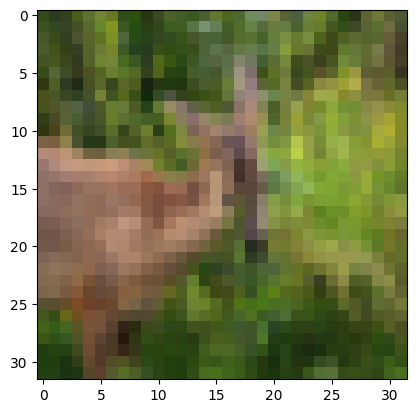

In [15]:
# Displaying the given image
print("Determining the similar images for this image:")
plt.imshow(x_tst_org[580])
plt.show()

In [16]:
# Determining information of the image
image_info = cosine_dataframe.iloc[580].values
print("Cosine Similarity Information of the image:\n",image_info)

Cosine Similarity Information of the image:
 [0.85159605 0.82760907 0.82675976 ... 0.65374253 0.83773165 0.85362017]


In [17]:
# Top-10 approach for recommendation of 10 similar images
# Displaying the index of 10 similar images
similar_image_idx = np.argsort(-image_info)[0:10]
print("The index of 10 similar images are:\n",similar_image_idx)

The index of 10 similar images are:
 [ 580 9116 4683 6699 2834 7256 5026 1551 3990 2575]


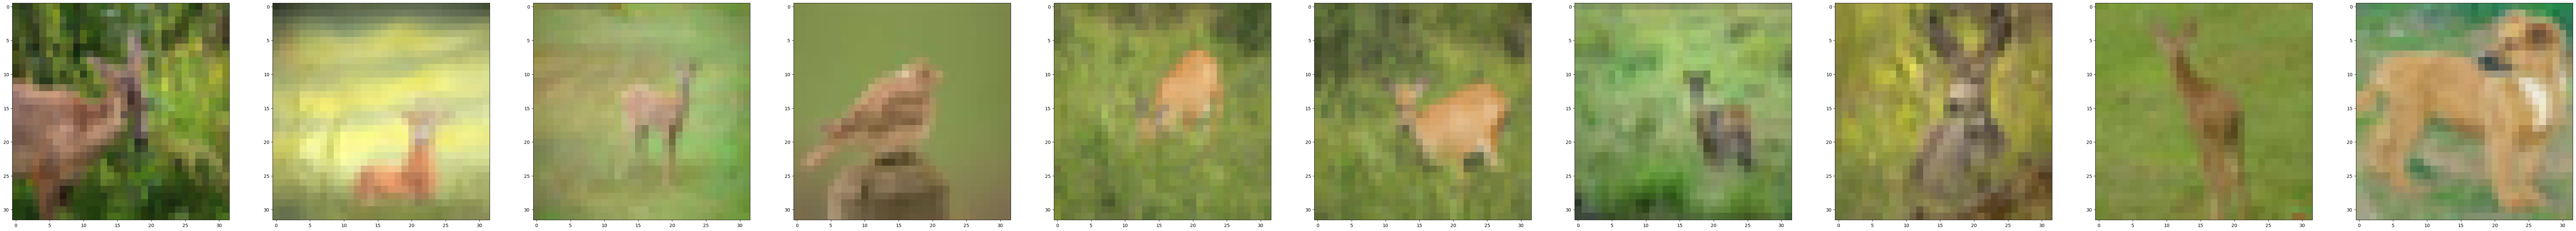

In [18]:
# Displaying the 10 similar images
plt.figure(1,figsize=(100,20))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_tst_org[similar_image_idx[i]])
plt.show()

In [19]:
# Value-based approach for recommendation of similar images
value_idx = np.where(image_info>0.93)
print("Number of items greater than 0.93 value:",len(sum(value_idx)))
print("The index of  similar images based on value:\n",value_idx)

Number of items greater than 0.93 value: 29
The index of  similar images based on value:
 (array([ 580, 1551, 2182, 2212, 2575, 2834, 3227, 3790, 3990, 4184, 4534,
       4604, 4683, 4957, 4965, 5026, 5244, 5402, 6666, 6699, 6720, 6858,
       7256, 8500, 8845, 8974, 9116, 9321, 9926]),)


# COSINE DISTANCES FOR IMAGE DATA ANALYSIS

In [20]:
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
# Determining the cosine distances between observations
cos_distances = cosine_distances(x_test)
print("The shape of the matrix is:",cos_distances.shape)
print("Details of cosine similarity:\n",cos_distances)

The shape of the matrix is: (10000, 10000)
Details of cosine similarity:
 [[0.         0.20416805 0.17848745 ... 0.35198779 0.17266805 0.16991186]
 [0.20416805 0.         0.07761942 ... 0.45637828 0.22767847 0.16340904]
 [0.17848745 0.07761942 0.         ... 0.47874227 0.2138218  0.13939397]
 ...
 [0.35198779 0.45637828 0.47874227 ... 0.         0.29128812 0.37472255]
 [0.17266805 0.22767847 0.2138218  ... 0.29128812 0.         0.21778698]
 [0.16991186 0.16340904 0.13939397 ... 0.37472255 0.21778698 0.        ]]


In [22]:
# Converting the dataframe
cosine_distances_dataframe = pd.DataFrame(cos_distances)
print(cosine_distances_dataframe)
print("Shape of the data frame is:",cosine_distances_dataframe.shape)

          0         1         2         3         4         5         6     \
0     0.000000  0.204168  0.178487  0.122904  0.147129  0.127664  0.244649   
1     0.204168  0.000000  0.077619  0.086653  0.225717  0.178254  0.331198   
2     0.178487  0.077619  0.000000  0.073396  0.216794  0.196592  0.302181   
3     0.122904  0.086653  0.073396  0.000000  0.154729  0.148479  0.265490   
4     0.147129  0.225717  0.216794  0.154729  0.000000  0.160042  0.277706   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.187875  0.200331  0.218592  0.169604  0.093241  0.186976  0.279030   
9996  0.138074  0.284632  0.277100  0.203802  0.103659  0.128460  0.270990   
9997  0.351988  0.456378  0.478742  0.404808  0.223829  0.353398  0.377067   
9998  0.172668  0.227678  0.213822  0.192357  0.142652  0.170419  0.278556   
9999  0.169912  0.163409  0.139394  0.117226  0.163800  0.185657  0.311523   

          7         8         9     ...      9990      9991    

In [23]:
cosine_distances_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,0.204168,0.178487,0.122904,0.147129,0.127664,0.244649,0.136271,0.095612,0.170647,...,0.283567,0.185274,0.226472,0.187921,0.219278,0.187875,0.138074,0.351988,0.172668,0.169912
1,0.204168,0.000000,0.077619,0.086653,0.225717,0.178254,0.331198,0.229131,0.155833,0.097252,...,0.274324,0.087249,0.385926,0.318981,0.224212,0.200331,0.284632,0.456378,0.227678,0.163409
2,0.178487,0.077619,0.000000,0.073396,0.216794,0.196592,0.302181,0.204442,0.134604,0.111622,...,0.258820,0.096994,0.420383,0.282518,0.231142,0.218592,0.277100,0.478742,0.213822,0.139394
3,0.122904,0.086653,0.073396,0.000000,0.154729,0.148479,0.265490,0.135417,0.081656,0.083787,...,0.228233,0.087632,0.320338,0.268911,0.214323,0.169604,0.203802,0.404808,0.192357,0.117226
4,0.147129,0.225717,0.216794,0.154729,0.000000,0.160042,0.277706,0.137790,0.081602,0.198824,...,0.227993,0.187729,0.143556,0.155955,0.166720,0.093241,0.103659,0.223829,0.142652,0.163800


Determining the similar images for this image:


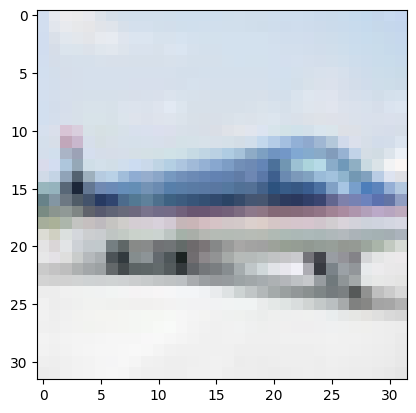

In [24]:
# Displaying the given image
print("Determining the similar images for this image:")
plt.imshow(x_tst_org[524])
plt.show()

In [25]:
# Determining information of the image
image_info = cosine_distances_dataframe.iloc[524].values
print("Cosine Distances with other  images:\n",image_info)

Cosine Distances with other  images:
 [0.12199304 0.12650423 0.13407123 ... 0.29096153 0.16640956 0.09625213]


In [26]:
# Top-10 approach for recommendation of 10 similar images
# Displaying the index of 10 similar images
similar_image_idx = np.argsort(image_info)[0:10]
print("The index of 10 similar images are:\n",similar_image_idx)

The index of 10 similar images are:
 [ 524 8903 1022 8694 7347 8960 8856 6937  857 8925]


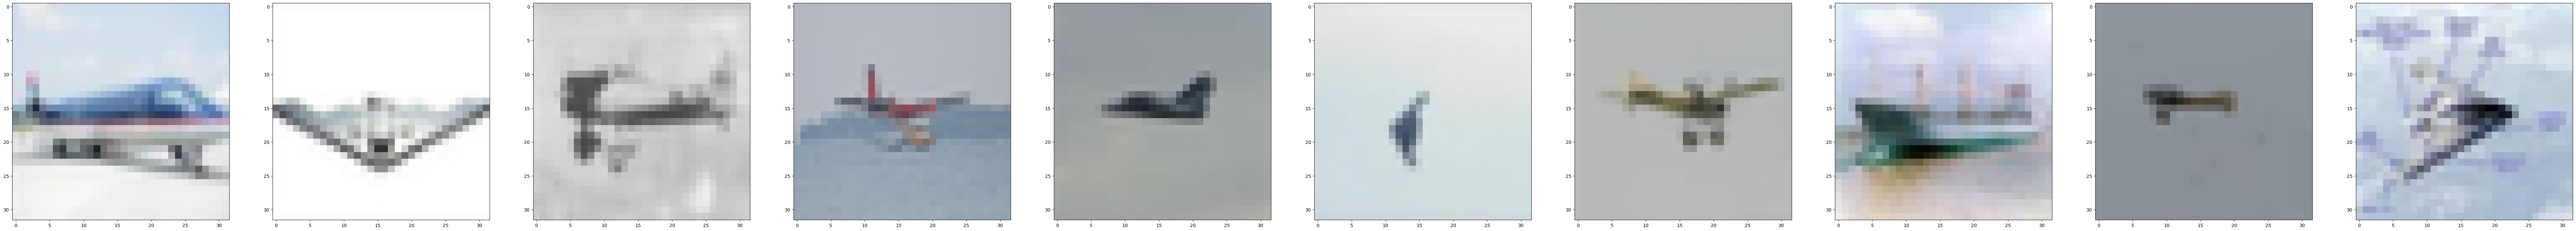

In [27]:
# Displaying the 10 similar images
plt.figure(1,figsize=(100,20))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_tst_org[similar_image_idx[i]])
plt.show()

In [28]:
# Value-based approach for recommendation of similar images
value_idx = np.where(image_info < 0.025)
print("Number of items less than 0.025 value:",len(sum(value_idx)))
print("The index of  similar images based on value:\n",value_idx)

Number of items less than 0.025 value: 34
The index of  similar images based on value:
 (array([ 218,  269,  313,  385,  499,  524,  857, 1022, 1078, 2041, 2507,
       2812, 3399, 3900, 4202, 4558, 5189, 5584, 6003, 6294, 6424, 6644,
       6937, 7303, 7347, 8230, 8694, 8720, 8856, 8903, 8925, 8960, 9356,
       9841]),)


# EUCLIDEAN DISTANCES FOR IMAGE DATA ANALYSIS

In [29]:
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Determining the euclidean distances between observations
euc_distances = euclidean_distances(x_test)
print("The shape of the matrix is:",euc_distances.shape)
print("Details of euclidean distances:\n",euc_distances)

The shape of the matrix is: (10000, 10000)
Details of euclidean distances:
 [[   0.         5943.42031157 4677.60066701 ... 4990.35108985
  3856.39650451 3804.52073197]
 [5943.42031157    0.         3786.27798768 ... 8118.32304112
  6181.45897018 5501.95210812]
 [4677.60066701 3786.27798768    0.         ... 7000.11442764
  5067.40150373 4209.25527855]
 ...
 [4990.35108985 8118.32304112 7000.11442764 ...    0.
  4646.60241467 5103.97355009]
 [3856.39650451 6181.45897018 5067.40150373 ... 4646.60241467
     0.         4322.18926009]
 [3804.52073197 5501.95210812 4209.25527855 ... 5103.97355009
  4322.18926009    0.        ]]


In [31]:
# Converting the dataframe
euc_distances_dataframe = pd.DataFrame(euc_distances)
print(euc_distances_dataframe)
print("Shape of the data frame is:",euc_distances_dataframe.shape)

             0            1            2            3            4     \
0        0.000000  5943.420312  4677.600667  4625.960117  3508.968509   
1     5943.420312     0.000000  3786.277988  3937.772467  6192.637322   
2     4677.600667  3786.277988     0.000000  3444.263201  5096.422863   
3     4625.960117  3937.772467  3444.263201     0.000000  5058.539809   
4     3508.968509  6192.637322  5096.422863  5058.539809     0.000000   
...           ...          ...          ...          ...          ...   
9995  6028.541864  6216.411666  6239.503746  5623.698605  4978.930909   
9996  3624.985655  6736.811709  5784.267024  5527.852929  3148.600483   
9997  4990.351090  8118.323041  7000.114428  7392.610973  4047.614853   
9998  3856.396505  6181.458970  5067.401504  5442.815907  3469.053761   
9999  3804.520732  5501.952108  4209.255279  4561.382356  3693.203487   

             5            6            7            8            9     ...  \
0     3208.366407  4326.982436  3307.692549  

In [32]:
euc_distances_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,5943.420312,4677.600667,4625.960117,3508.968509,3208.366407,4326.982436,3307.692549,4293.886934,4926.937081,...,5671.372497,4410.994559,4923.437925,4433.478657,4403.079945,6028.541864,3624.985655,4990.351090,3856.396505,3804.520732
1,5943.420312,0.000000,3786.277988,3937.772467,6192.637322,5827.302292,7221.819161,6474.587941,5270.297145,4145.520956,...,6714.711088,4119.839560,7815.473370,7127.744524,6124.495898,6216.411666,6736.811709,8118.323041,6181.458970,5501.952108
2,4677.600667,3786.277988,0.000000,3444.263201,5096.422863,4919.166901,5873.869508,5097.767354,4606.038319,4031.860985,...,5847.398225,3526.046370,7307.894019,5953.373581,5259.703889,6239.503746,5784.267024,7000.114428,5067.401504,4209.255279
3,4625.960117,3937.772467,3444.263201,0.000000,5058.539809,5117.727621,6306.927461,5237.980050,3700.013513,3677.016182,...,5893.660068,3813.010884,6866.571197,6294.041468,5665.807974,5623.698605,5527.852929,7392.610973,5442.815907,4561.382356
4,3508.968509,6192.637322,5096.422863,5058.539809,0.000000,3517.734925,4511.691590,3237.545366,4166.847849,5258.864611,...,5121.941038,4427.890581,3989.564513,4058.115942,3806.596511,4978.930909,3148.600483,4047.614853,3469.053761,3693.203487


Determining the similar images for this image:


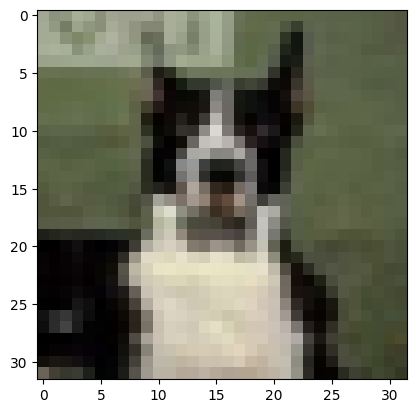

In [33]:
# Displaying the given image
print("Determining the similar images for this image:")
plt.imshow(x_tst_org[345])
plt.show()

In [34]:
# Determining information of the image
image_info = cosine_distances_dataframe.iloc[345].values
print("Euclidean Distances with other  images:\n",image_info)

Euclidean Distances with other  images:
 [0.25384264 0.26624649 0.23736737 ... 0.28735357 0.22849331 0.21477811]


In [35]:
# Top-10 approach for recommendation of 10 similar images
# Displaying the index of 10 similar images
similar_image_idx = np.argsort(image_info)[0:10]
print("The index of 10 similar images are:\n",similar_image_idx)

The index of 10 similar images are:
 [ 345 4462 6311 3456 9778 1274 6272 9745 3106 6914]


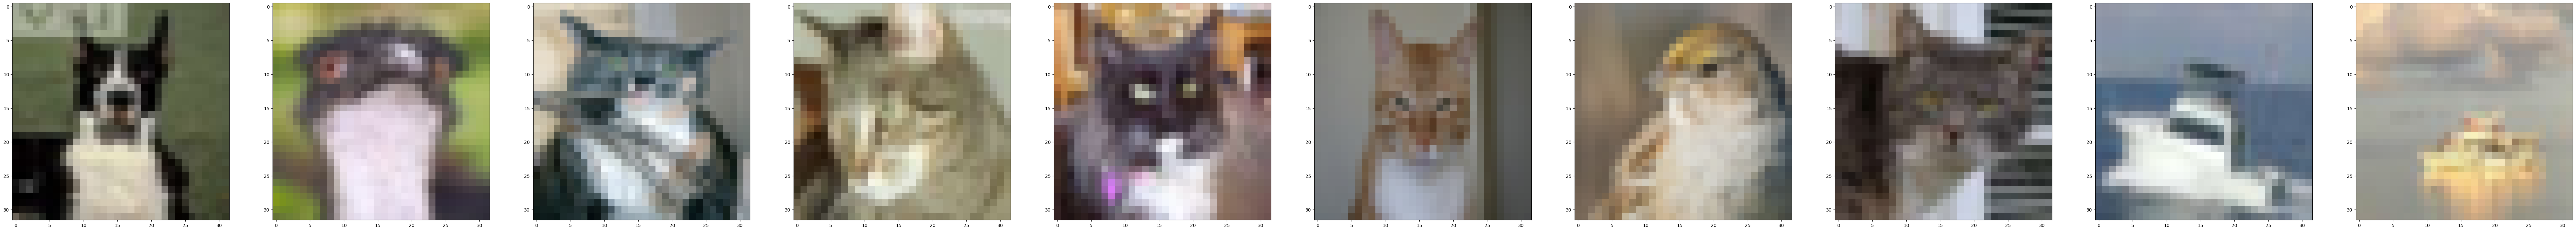

In [36]:
# Displaying the 10 similar images
plt.figure(1,figsize=(100,20))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_tst_org[similar_image_idx[i]])
plt.show()

In [37]:
# Value-based approach for recommendation of similar images
value_idx = np.where(image_info < 3350)
print("Number of items less than 3350 value:",len(sum(value_idx)))
print("The index of  similar images based on value:\n",value_idx)

Number of items less than 3350 value: 10000
The index of  similar images based on value:
 (array([   0,    1,    2, ..., 9997, 9998, 9999]),)


# MANHATTAN DISTANCES FOR IMAGE DATA ANALYSIS

In [38]:
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
# Determining the cosine distances between observations
man_distances = manhattan_distances(x_test)
print("The shape of the matrix is:",man_distances.shape)
print("Details of Manhattan distances:\n",man_distances)

The shape of the matrix is: (10000, 10000)
Details of Manhattan distances:
 [[     0. 279915. 207564. ... 231434. 174188. 167530.]
 [279915.      0. 164673. ... 385227. 286475. 255745.]
 [207564. 164673.      0. ... 323484. 222612. 188534.]
 ...
 [231434. 385227. 323484. ...      0. 209254. 226890.]
 [174188. 286475. 222612. ... 209254.      0. 177674.]
 [167530. 255745. 188534. ... 226890. 177674.      0.]]


In [41]:
# Converting the dataframe
man_distances_dataframe = pd.DataFrame(man_distances)
print(man_distances_dataframe)
print("Shape of the data frame is:",man_distances_dataframe.shape)

          0         1         2         3         4         5         6     \
0          0.0  279915.0  207564.0  211939.0  157778.0  137383.0  196653.0   
1     279915.0       0.0  164673.0  177606.0  290227.0  278922.0  335624.0   
2     207564.0  164673.0       0.0  159045.0  225986.0  222767.0  260591.0   
3     211939.0  177606.0  159045.0       0.0  244881.0  236888.0  292072.0   
4     157778.0  290227.0  225986.0  244881.0       0.0  157223.0  213945.0   
...        ...       ...       ...       ...       ...       ...       ...   
9995  286401.0  289426.0  300783.0  262966.0  234847.0  284914.0  331664.0   
9996  163543.0  321042.0  271199.0  265970.0  138197.0  156006.0  225440.0   
9997  231434.0  385227.0  323484.0  364303.0  191582.0  219285.0  183251.0   
9998  174188.0  286475.0  222612.0  251233.0  157744.0  165193.0  209327.0   
9999  167530.0  255745.0  188534.0  214549.0  154846.0  164651.0  216545.0   

          7         8         9     ...      9990      9991    

In [42]:
man_distances_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,279915.0,207564.0,211939.0,157778.0,137383.0,196653.0,145666.0,195975.0,224067.0,...,271296.0,193389.0,223385.0,201225.0,194337.0,286401.0,163543.0,231434.0,174188.0,167530.0
1,279915.0,0.0,164673.0,177606.0,290227.0,278922.0,335624.0,309661.0,232666.0,182358.0,...,310921.0,189760.0,378742.0,347738.0,285334.0,289426.0,321042.0,385227.0,286475.0,255745.0
2,207564.0,164673.0,0.0,159045.0,225986.0,222767.0,260591.0,222828.0,216161.0,176843.0,...,291782.0,167753.0,338713.0,275659.0,242161.0,300783.0,271199.0,323484.0,222612.0,188534.0
3,211939.0,177606.0,159045.0,0.0,244881.0,236888.0,292072.0,243149.0,163614.0,161686.0,...,271387.0,167346.0,337384.0,309178.0,262496.0,262966.0,265970.0,364303.0,251233.0,214549.0
4,157778.0,290227.0,225986.0,244881.0,0.0,157223.0,213945.0,144364.0,190971.0,243715.0,...,247984.0,202601.0,175521.0,180075.0,171787.0,234847.0,138197.0,191582.0,157744.0,154846.0


Determining the similar images for this image:


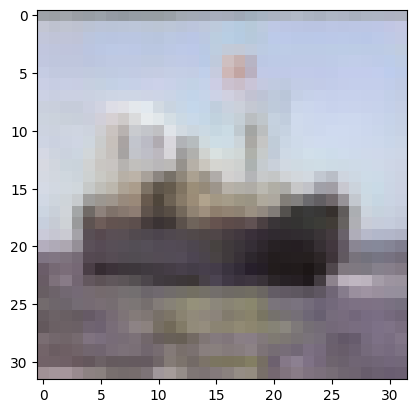

In [43]:
# Displaying the given image
print("Determining the similar images for this image:")
plt.imshow(x_tst_org[712])
plt.show()

In [44]:
# Determining information of the image
image_info = man_distances_dataframe.iloc[712].values
print("Manhattan Distances with other  images:\n",image_info)

Manhattan Distances with other  images:
 [222483. 147696. 182923. ... 352337. 247733. 203585.]


In [45]:
# Top-10 approach for recommendation of 10 similar images
# Displaying the index of 10 similar images
similar_image_idx = np.argsort(image_info)[0:10]
print("The index of 10 similar images are:\n",similar_image_idx)

The index of 10 similar images are:
 [ 712 2553 1011 3847 2398 4397 9144 5614 9499 5140]


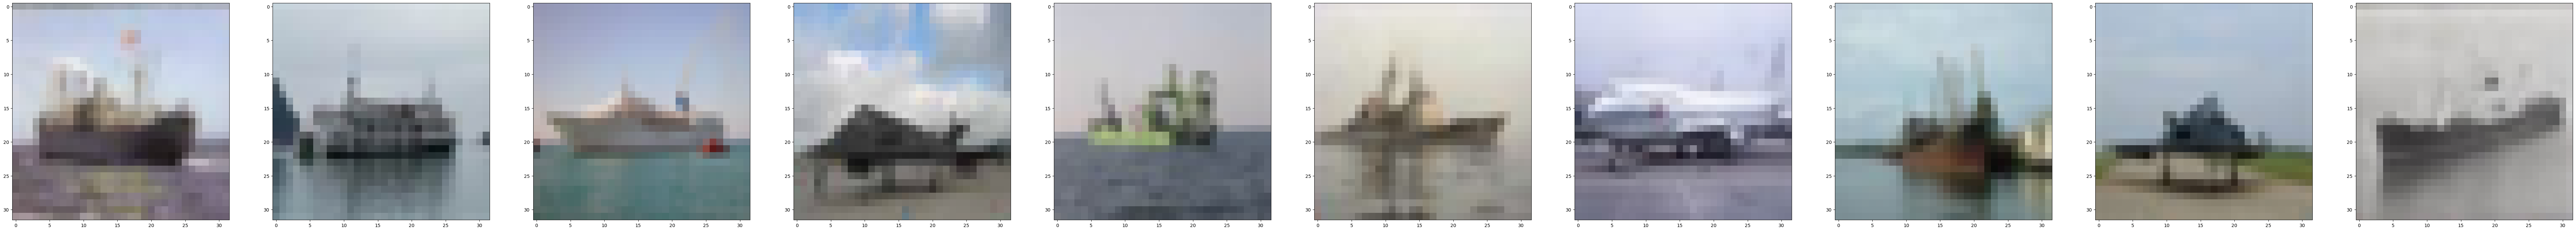

In [46]:
# Displaying the 10 similar images
plt.figure(1,figsize=(100,20))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_tst_org[similar_image_idx[i]])
plt.show()

In [47]:
# Value-based approach for recommendation of similar images
value_idx = np.where(image_info < 99000)
print("Number of items less than 99000 value:",len(sum(value_idx)))
print("The index of  similar images based on value:\n",value_idx)

Number of items less than 99000 value: 42
The index of  similar images based on value:
 (array([  72,  287,  712,  904,  999, 1011, 1101, 1144, 1358, 1778, 2064,
       2194, 2398, 2553, 3193, 3515, 3847, 3911, 3950, 4145, 4328, 4397,
       4798, 5031, 5140, 5457, 5614, 5688, 6484, 7103, 7695, 7768, 7850,
       7995, 8501, 8826, 9144, 9499, 9600, 9669, 9846, 9864]),)
